# Introduction to Neural Networks

![dense](images/dogcat.gif)

## Objectives
- Describe the basic structure of densely connected neural networks
- Describe the concept of backpropagation
- Explain the use of gradient descent in neural networks
- Use `keras` to code up a neural network model

# Introduction to Neural Networks

## Background

Neural networks have been around for a while. They are over 70 years old, dating back to  their proposal in 1944 by Warren McCullough and Walter Pitts. These first proposed neural nets had thresholds and weights, but no layers and no specific training mechanisms.

The "perceptron", the first trainable neural network, was created by Frank Rosenblatt in 1957. It consisted of a single layer with adjustable weights in the middle of input and output layers.

![perceptron](images/nn-diagram.png)

## Wait, Wait, Wait... Why a Neural Network?

You really should take a second to realize what tools we already have and ask yourself, "Do we really need to use this 'neural network' if we already have so many machine learning algorithms?"

And in short, we don't need to default to a neural network but they have advantages in solving very complex problems. It might help to know that idea of neural networks was developed back in the 1950s (perceptron network). It wasn't until we had a lot of data and computational power where they became reasonably useful.

### Let's Talk About Interpretability...

![](images/accuracy_vs_interpretability.png)

[Image Source](https://medium.com/ansaro-blog/interpreting-machine-learning-models-1234d735d6c9g/)

### And yet, the pull of deep learning is strong...

<img src='images/move_on.jpg' width=350/>

## Applications of Neural Networks

- Clustering
- Pattern Recognition
- Image Recognition (CNN)
- Time Series Forecasting (RNN)
- Audio/Video/Image Generation (GAN) 

#### Limitations
- Good for prediction, bad for inference 
- Computationally expensive 

## Starting with a Perceptron

### A Diagram

<img src='https://cdn-images-1.medium.com/max/1600/0*No3vRruq7Dd4sxdn.png' width=40%/>

Notice the similarity to a linear regression:


$$ x_1 w_1 + x_2 w_2  + x_3 w_3 = \text{output}$$
$$ XW = \text{output}$$

## Logistic Regression as a Perceptron

* This is **one row of data**, each input is a different feature
* Weights are determined through gradient descent 
* The **bias** term is our logistic regression intercept term
* The **activation function** is the sigmoid function that forces output values between 0 and 1
* Output is our classification result

![](https://miro.medium.com/max/1280/1*8VSBCaqL2XeSCZQe_BAyVA.jpeg)


* The perceptron algorithm is about learning the weights for inputs in order to draw a **linear decision boundary** that allows us to discriminate between two linearly separable classes
* A perceptron takes in inputs, sums them up with weights, adds a bias, applies some activation function --> output
* You can have different activation functions (sigmoid, tanh, ReLu, etc.)
* Many perceptrons put together create a neural network

<img src='images/perceptron_binary.png'/>


## Basic Architecture

For our DS purposes, we'll generally imagine our network to consist of only a few layers, including an input layer (where we feed in our data) an output layer (comprising our predictions). Significantly, there will also (generally) be one or more layers of neurons between input and output, called **hidden layers**.

One reason these are named hidden layers is that what their output actually represents is _not really known_.  The activation of node 1 of the first hidden layer may represent a sequence of pixel intensity corresponding to a horizontal line, or a group of dark pixels in the middle of a number's loop... etc etc.

![dense](images/Deeper_network.jpg)

Because we are unaware of how exactly these hidden layers are operating, neural networks are considered **black box** algorithms.  You will not be able to gain much inferential insight from a neural net.

Each of our pixels from our digit representation goes to each of our nodes, and each node has a set of weights and a bias term associated with it.

## Inspiration from Actual Neurons

The composition of neural networks can be **loosely** compared to a neuron.

![neuron](images/neuron.png)

Neural networks draw their inspiration from the biology of our own brains, which are of course also accurately described as 'neural networks'. A human brain contains around $10^{11}$ neurons, connected very **densely**.

This is a loose analogy, but can be a helpful **mnemonic**. The inputs to our node are like inputs to our neurons. They are either direct sensory information (our features) or input from other axons (nodes passing information to other nodes). The body of our neuron (soma) is where the signals of the dendrites are summed together, which is loosely analogous to our **collector function**. If the summed signal is large enough (our **activation function**), they trigger an action potential which travels down the axon to be passed as output to other dendrites. See [here](https://en.wikipedia.org/wiki/Neuron) for more. 

## Parts of a Neural Network

### Layers

- **Input Layer**: the initial parameters (these will be the parts we feed to our network)
- **Output Layer**: the classification (or regression predictions)
- **Hidden Layer(s)**: the other neurons potentially in a neural network to find more complex patterns

### Weights

The weights from our inputs are describing how much they should contribute to the next neuron.

But we can also think of the weights of hidden layer neurons telling us how much of these linear separations should be combined.

### Activation Functions

<img src='images/activation.png' width=500/>

The activation function converts our summed inputs into an output, which is then passed on to other nodes in hidden layers, or as an end product in the output layer. This can loosely be thought of as the action potential traveling down the axon.

When we build our models in `keras`, we will specify the activation function of both hidden layers and output.

### Other Hyperparameters

We'll talk more about this when we dive into how to optimize our neural networks, but some hyperparameters include:

- **Learning Rate ($\alpha$)**: how big of a step we take in gradient descent
- **Number of Epochs**: how many times we repeat this process
- **Batch Size**: how many data points we use in a single training session (1 epoch)
    - KEY! This is how often we send results back to update our weights, aka _back-propogation_!

Remember, any parameter adjusted to enhance the neural network's learning _is_ a hyperparameter (this includes the actual structure of the neural net)

## Let's see it in action!

Now we know the vocabulary of the different parts, let's try it out for ourselves!

First up:
- [playground.tensorflow.org](https://playground.tensorflow.org): A visual playground for us to train a neural network

#### Spaceship Titanic Data!

In [1]:
#Initial imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('data/train.csv', )
holdout = pd.read_csv('data/test.csv')

In [3]:
X = df.drop(columns='Transported')
y = df['Transported']

#### Still need a Train/Test Split

I'll note, it's much more often that you'll see train/val/test with neural networks, aka 3 pieces instead of just two

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [5]:
# train-test split causing two cols to be bool instead of obj
# fixing to pre-empt a type error 
map_bools = {True: 'True', False:'False', np.nan:np.nan}
for col in ['VIP', 'CryoSleep']:
    for dataset in [X_train, X_test, holdout]:
        dataset[col] = dataset[col].map(map_bools)

<ipython-input-5-c5e4e2e044cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset[col].map(map_bools)


In [6]:
# Just going to run our test on num_cols
num_cols = [col for col in X_train.columns if X_train[col].dtype != 'O']

In [7]:
X_train[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5019 entries, 4861 to 860
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           4919 non-null   float64
 1   RoomService   4909 non-null   float64
 2   FoodCourt     4919 non-null   float64
 3   ShoppingMall  4887 non-null   float64
 4   Spa           4905 non-null   float64
 5   VRDeck        4920 non-null   float64
dtypes: float64(6)
memory usage: 274.5 KB


In [8]:
X_train[num_cols].head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
4861,19.0,0.0,0.0,0.0,0.0,0.0
1295,28.0,0.0,4424.0,3.0,207.0,1572.0
1496,20.0,75.0,0.0,0.0,1545.0,0.0
2112,40.0,0.0,0.0,0.0,0.0,0.0
1520,20.0,212.0,0.0,991.0,0.0,13.0


In [9]:
# We'll use two different imputation strategies
median_num_col = ['Age']

zero_num_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [10]:
# Creating our imputer
median_imp = SimpleImputer(strategy="median")
zero_imp = SimpleImputer(strategy='constant', fill_value = 0)

imputer = ColumnTransformer(
    transformers=[
        ("med", median_imp, median_num_col),
        ("zero", zero_imp, zero_num_cols),
    ]
)

### Logistic Regression to Compare To!

In [11]:
clf = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', MinMaxScaler()), 
    ('logreg', LogisticRegression())
])

clf.fit(X_train[num_cols], y_train)

train_preds = clf.predict(X_train[num_cols])
test_preds = clf.predict(X_test[num_cols])

print(f"Train accuracy score: {clf.score(X_train[num_cols], y_train)}")

print(f"Test accuracy score: {clf.score(X_test[num_cols], y_test)}")

Train accuracy score: 0.7286312014345487
Test accuracy score: 0.7192353643966547


## Define Our First Model!
Models in Keras are defined as a sequence of layers. We create a Sequential model and add layers one at a time until we are happy with our network topology. Documentation: https://keras.io/guides/sequential_model/

*   Metrics: https://keras.io/api/metrics/
*   Optimizers: https://keras.io/api/optimizers/
*   Loss: https://keras.io/api/losses/

In [12]:
# Preprocess our data first
# NNs are linear models - we still need to scale!
preprocessor = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', MinMaxScaler()),
])

preprocessor.fit(X_train[num_cols])

X_tr_pr = preprocessor.transform(X_train[num_cols])
X_te_pr = preprocessor.transform(X_test[num_cols])

In [13]:
X_tr_pr.shape

(5019, 6)

In [14]:
# Need more imports!
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout

> Note! You may also see `keras` as its own separate library, but it's been integrated into tensorflow since TF V2.0 - you should make sure to use `keras` from the tensorflow library!
>
> [Source, which includes interesting reading on the history of tensorflow and keras](https://pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/)

A common way to build models in tensorflow/keras is to create an empty base model and then add layers in order - so that's what we'll do!

We'll create a NN with an input layer, one hidden layer, and then an output layer.

In [15]:
# Create our base, empty Sequential model
model = Sequential()

# Add a dense input layer -- model.add(Dense())
# 12 nodes, input_dim = our # of cols, activation = 'relu'
model.add(Dense(12, input_dim=6, activation = 'relu'))

# Add another 12 node dense layer with relu - no need for input_dim
model.add(Dense(12, activation='relu'))

# output layer - dense layer with 1 node, activation = 'sigmoid'
model.add(Dense(1, activation='sigmoid'))

# And then compile our model! -- model.compile()
# loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                84        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [17]:
# We then fit our model 
history = model.fit(X_tr_pr,        # Features
                    y_train,        # Target
                    epochs=100,     # Number of epochs
                    verbose=2,      # Verbosity level - Some output
                    batch_size=100, # Number of observations per batch
                    validation_data=(X_te_pr, y_test)) # Data for evaluation

Epoch 1/100
51/51 - 0s - loss: 0.6781 - accuracy: 0.6356 - val_loss: 0.6689 - val_accuracy: 0.6786
Epoch 2/100
51/51 - 0s - loss: 0.6604 - accuracy: 0.6732 - val_loss: 0.6515 - val_accuracy: 0.6673
Epoch 3/100
51/51 - 0s - loss: 0.6424 - accuracy: 0.6760 - val_loss: 0.6328 - val_accuracy: 0.6816
Epoch 4/100
51/51 - 0s - loss: 0.6228 - accuracy: 0.6983 - val_loss: 0.6139 - val_accuracy: 0.6822
Epoch 5/100
51/51 - 0s - loss: 0.6032 - accuracy: 0.7053 - val_loss: 0.5944 - val_accuracy: 0.6959
Epoch 6/100
51/51 - 0s - loss: 0.5857 - accuracy: 0.7175 - val_loss: 0.5769 - val_accuracy: 0.7419
Epoch 7/100
51/51 - 0s - loss: 0.5702 - accuracy: 0.7386 - val_loss: 0.5630 - val_accuracy: 0.7186
Epoch 8/100
51/51 - 0s - loss: 0.5578 - accuracy: 0.7346 - val_loss: 0.5523 - val_accuracy: 0.7252
Epoch 9/100
51/51 - 0s - loss: 0.5465 - accuracy: 0.7531 - val_loss: 0.5441 - val_accuracy: 0.7342
Epoch 10/100
51/51 - 0s - loss: 0.5390 - accuracy: 0.7531 - val_loss: 0.5362 - val_accuracy: 0.7473
Epoch 11/

51/51 - 0s - loss: 0.4875 - accuracy: 0.7902 - val_loss: 0.4918 - val_accuracy: 0.7885
Epoch 84/100
51/51 - 0s - loss: 0.4873 - accuracy: 0.7898 - val_loss: 0.4919 - val_accuracy: 0.7879
Epoch 85/100
51/51 - 0s - loss: 0.4875 - accuracy: 0.7898 - val_loss: 0.4912 - val_accuracy: 0.7885
Epoch 86/100
51/51 - 0s - loss: 0.4872 - accuracy: 0.7904 - val_loss: 0.4944 - val_accuracy: 0.7849
Epoch 87/100
51/51 - 0s - loss: 0.4865 - accuracy: 0.7894 - val_loss: 0.4923 - val_accuracy: 0.7873
Epoch 88/100
51/51 - 0s - loss: 0.4866 - accuracy: 0.7912 - val_loss: 0.4911 - val_accuracy: 0.7885
Epoch 89/100
51/51 - 0s - loss: 0.4866 - accuracy: 0.7906 - val_loss: 0.4907 - val_accuracy: 0.7879
Epoch 90/100
51/51 - 0s - loss: 0.4861 - accuracy: 0.7892 - val_loss: 0.4926 - val_accuracy: 0.7867
Epoch 91/100
51/51 - 0s - loss: 0.4861 - accuracy: 0.7896 - val_loss: 0.4908 - val_accuracy: 0.7891
Epoch 92/100
51/51 - 0s - loss: 0.4855 - accuracy: 0.7914 - val_loss: 0.4902 - val_accuracy: 0.7891
Epoch 93/100


Let's discuss this summary output...

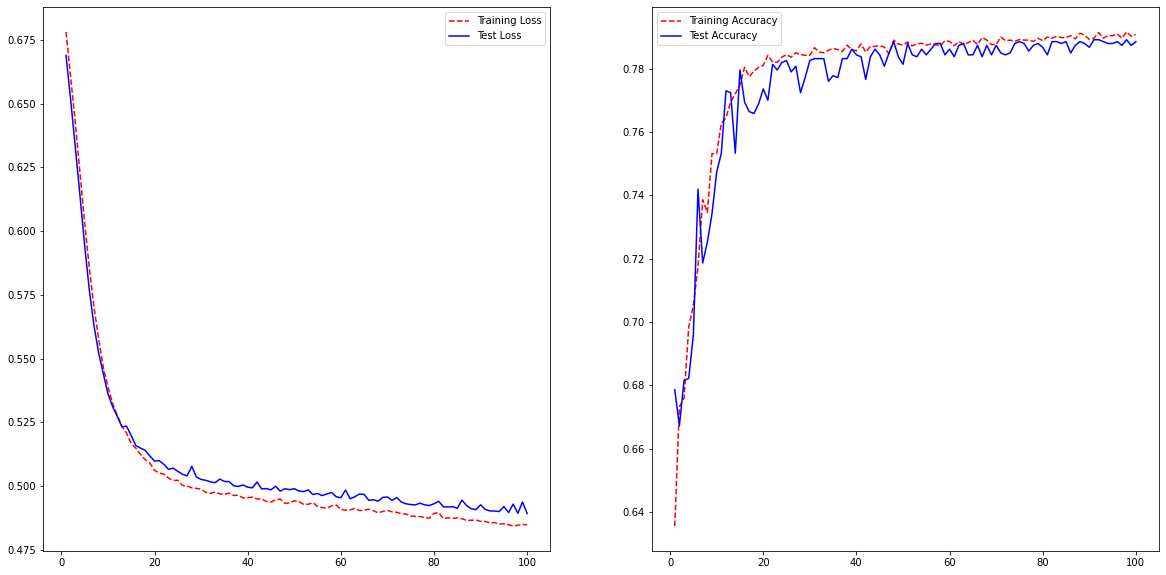

In [18]:
# Get training and test loss/accuracy histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r--')
ax1.plot(epoch_count, test_loss, 'b-')
ax1.legend(['Training Loss', 'Test Loss'])

# Visualize accuracy  history
ax2.plot(epoch_count, training_acc, 'r--')
ax2.plot(epoch_count, test_acc, 'b-')
ax2.legend(['Training Accuracy', 'Test Accuracy']);

In [19]:
print(f"LogReg's accuracy score: {clf.score(X_test[num_cols], y_test)}")
print(f"Simple NN's best accuracy score: {max(test_acc)}")

LogReg's accuracy score: 0.7192353643966547
Simple NN's best accuracy score: 0.7891278266906738


### Discuss!

- 


## Break It Down

Now that we've built our first model and seen it in action, let's discuss some of those pieces.

### Loss Functions

First up, let's talk about our loss function.

Loss functions are akin to cost functions we were trying to minimize in gradient descent (i.e. RMSE for linear regression, Gini/entropy for trees)

1. For regression problems, keras has **mean_squared_error** or **mean_absolute_error** as a loss function, or **mean_squared_logarithmic_error** if your target has potential outliers
2. For binary classification: **binary_crossentropy** (what we used above!)
3. For multiclass problems: **categorical_crossentropy**

[This article summarizes the above, and more.](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)



### Gradient Descent in Neural Networks
Neural Nets are usually implemented at scale with large sets of data, therefore optimizing for speed becomes a big concern. Gradient descent can take a very **very** long time to run if we use a single training example every time to update the weights and biases. Therefore, we usually use batch-mode:

- **Batch**: 
In batch gradient descent, we pass all of the training examples through the forward propagation stage before using backpropagation to compute the weights and biases

- **Epoch**: 
An epoch is when you're done passing all training examples through the forward propagation


We set our epoch and batch sizes when fitting the model - above, we used 100 for each. That means we broke our data down into chunks of 100 training observations - that's *one batch*. When ALL batches have gone through, that's *one epoch*!


#### Types of Gradient Descent
- Stochastic Gradient Descent 

    - SGD calculates the error and update the weight after training each observation in the training set. 

- Batch Gradient Descent

    - Batch calculates the error after each example is trained, but only updates the weight after all of the observations have been trained

- Mini-Batch Gradient Descent

    - Mini-batch is a compromise between batch and SGD - it splits the training examples into mini batches, and calculates the error and update the weight after each iteration of the mini batches are done training. 


#### Forward Propogation

Forward propogation is how data moves through the network, from the initial input layer through any hidden layers to the output layer.

On the first pass, when we feed the node values forward through layers, we initialize the weights with *random* values and biases to be zero. 

#### Back Propogation

After a certain number of data points have been passed through the model (batch), the weights will be *updated* with an eye toward optimizing our loss function. (Thinking back to biological neurons, this is like revising their activation potentials.) Typically, this is done by using some version of gradient descent.

#### Overview of the Forward & Back Propogation Process

![backprop](images/ff-bb.gif)

There are a lot more pieces we'll continue to explore, but for now let's copy our model from above and adjust some pieces to see how its performance changes!

In [26]:
# Code here to iterate!
model_2 = Sequential()

model_2.add(tf.keras.Input(shape=6))
# Add a dense input layer -- model.add(Dense())
# 12 nodes, input_dim = our # of cols, activation = 'relu'
# model_2.add(Dense(12, input_dim=6, activation = 'relu'))
model_2.add(Dense(12, activation='relu'))

# Add another 12 node dense layer with relu - no need for input_dim
model_2.add(Dense(12, activation='relu'))

model_2.add(Dense(12, activation='relu'))


# output layer - dense layer with 1 node, activation = 'sigmoid'
model_2.add(Dense(1, activation='tanh'))

# And then compile our model! -- model.compile()
# loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy']
model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
X_tr_pr.shape

(5019, 6)

In [31]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_8 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_9 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 13        
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


In [28]:
history_2 = model_2.fit(
    X_tr_pr,
    y_train,
    batch_size=150,
    epochs=81,
    verbose=2,
    validation_data=(X_te_pr, y_test)
)

Epoch 1/81
34/34 - 0s - loss: 1.1236 - accuracy: 0.4852 - val_loss: 0.8487 - val_accuracy: 0.4976
Epoch 2/81
34/34 - 0s - loss: 0.7907 - accuracy: 0.4810 - val_loss: 0.7389 - val_accuracy: 0.4863
Epoch 3/81
34/34 - 0s - loss: 0.7332 - accuracy: 0.4800 - val_loss: 0.7212 - val_accuracy: 0.4946
Epoch 4/81
34/34 - 0s - loss: 0.7146 - accuracy: 0.4935 - val_loss: 0.6996 - val_accuracy: 0.5394
Epoch 5/81
34/34 - 0s - loss: 0.6875 - accuracy: 0.5565 - val_loss: 0.6681 - val_accuracy: 0.5980
Epoch 6/81
34/34 - 0s - loss: 0.6520 - accuracy: 0.6298 - val_loss: 0.6260 - val_accuracy: 0.6840
Epoch 7/81
34/34 - 0s - loss: 0.6111 - accuracy: 0.7093 - val_loss: 0.5937 - val_accuracy: 0.7043
Epoch 8/81
34/34 - 0s - loss: 0.5886 - accuracy: 0.7213 - val_loss: 0.5782 - val_accuracy: 0.6959
Epoch 9/81
34/34 - 0s - loss: 0.5776 - accuracy: 0.7340 - val_loss: 0.5703 - val_accuracy: 0.7324
Epoch 10/81
34/34 - 0s - loss: 0.5727 - accuracy: 0.7486 - val_loss: 0.5602 - val_accuracy: 0.7366
Epoch 11/81
34/34 -

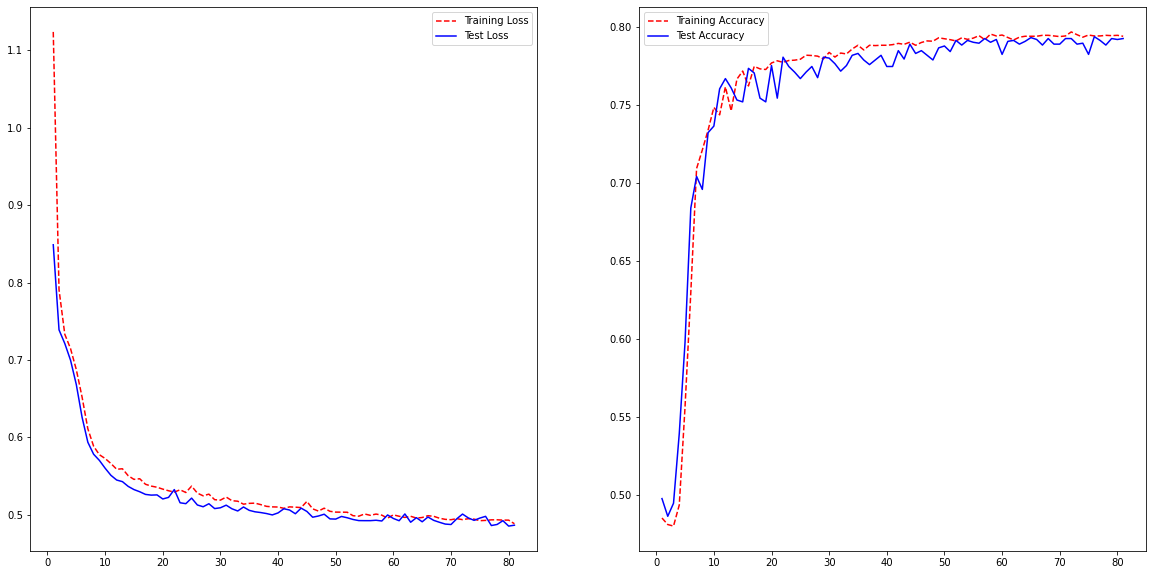

In [29]:
# Get training and test loss/accuracy histories
training_loss_2 = history_2.history['loss']
test_loss_2 = history_2.history['val_loss']

training_acc_2 = history_2.history['accuracy']
test_acc_2 = history_2.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss_2) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Visualize loss history
ax1.plot(epoch_count, training_loss_2, 'r--')
ax1.plot(epoch_count, test_loss_2, 'b-')
ax1.legend(['Training Loss', 'Test Loss'])

# Visualize accuracy  history
ax2.plot(epoch_count, training_acc_2, 'r--')
ax2.plot(epoch_count, test_acc_2, 'b-')
ax2.legend(['Training Accuracy', 'Test Accuracy']);

In [30]:
print(f"LogReg's accuracy score: {clf.score(X_test[num_cols], y_test)}")
print(f"Simple NN's best accuracy score: {max(test_acc)}")
print(f"Second NN's best accuracy score: {max(test_acc_2)}")

LogReg's accuracy score: 0.7192353643966547
Simple NN's best accuracy score: 0.7891278266906738
Second NN's best accuracy score: 0.7939068078994751


## Resources

- A very basic, visual intro to neural networks: https://jalammar.github.io/visual-interactive-guide-basics-neural-networks/
- Great video explanation of backpropagation by 3Blue1Brown (part of a full playlist): [Backpropagation calculus | Deep learning, chapter 4](https://www.youtube.com/watch?v=tIeHLnjs5U8&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=4)
- These are all neural networks! [The Neural Network Zoo](https://www.asimovinstitute.org/neural-network-zoo/)
- Tips and tricks from Stanford (CS 230 - Deep Learning): https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-deep-learning-tips-and-tricks#good-practices

#### Deep Learning Courses:

* Google's Machine Learning Crash Course (which uses tensorflow): https://developers.google.com/machine-learning/crash-course/

* Deep Learning Wizard (which uses pytorch): https://www.deeplearningwizard.com/